#Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студентки гр. 2384 Соц Екатерина Андреевна и Лавренова Юлия Дмитриевна. Вариант №17.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.


## Основные теоретические положения

Циклическая частота связана с частотой следующим соотношением:
$\omega = 2 \pi f$

Входной сигнал $s(t)$

$$ s(t) = \sum_{k=1}^{N} c_k \cdot e^{j 2 \pi f_k t} $$

Выходной сигнал $y(t)$

$$ y(t) = \sum_{k=1}^{N} c_k \cdot \tilde{H}(f_k) \cdot e^{j 2 \pi f_k t} $$
где $\tilde{H}(f)$ - передаточная функция фильтра.

## Постановка задачи
Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.


1. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.
2. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.
3. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.
4. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.
5. Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.
6. Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.
7. Сделать выводы.



### **1**. Сглаживание прямой линией

Выведем формулу для сглаживания прямой линией.

Выходной сигнал равен $y(t)= A + Bt$

Входной сигнал равен $s(t)$

Приближение в смысле МНК по 3 точкам:
$F(A,B) = \sum_{k=-1}^{k=1}(s_k-y_k) = \sum_{k=-1}^{k=1}(s_k-A-Bt)$

Система нормальных уравнений:

\begin{equation}
\left\{
\begin{aligned}
3A + 0B &= \sum_{k=-1}^{k=1}s_k \\
0A - 2B &= \sum_{k=-1}^{k=1}k*s_k
\end{aligned}
\right.
\end{equation}

Получаем

$y_0 = \frac{1}{3} \sum_{k=-1}^{k=1}s_k$

В общем случае

$y_n = \frac{1}{3} \sum_{k=n-1}^{k=n+1}s_k = \frac{1}{3} (s_{-1} + s_0 + s_1)$

Так как $s_n = e^{i\omega n}$, то получаем

$y_n = \frac{1}{3} (e^{-i\omega} + e^{i\omega*0} + e^{i\omega}) = \frac{1}{3} (cos(\omega) - isin(\omega) + 1 + cos(\omega) + isin(\omega)) = \frac{1}{3} (1 + 2cos(\omega))$

Обобщим формулу для $2m+1$ точек

$H(\omega) = \frac{1}{2m+1} (1 + 2cos(\omega) + 2cos(2\omega)+ ... + 2cos(m\omega))$

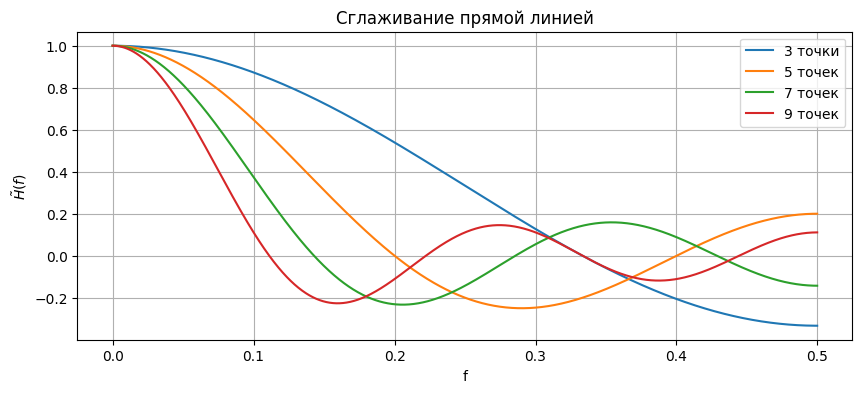

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

#функция вычисления
def H(w, k):
    return 2 * np.cos(k * w)

step = 0.0003
# Циклические частоты
F = np.arange(0, 0.5, step)
# Круговые частоты
w = np.array([2 * math.pi * f for f in F])

h_lin = {}
n_points = [3, 5, 7, 9] #массив числа точек

for n in n_points:
  curr_h_n = 1
  #расчет H(w) для каждого числа точек
  for i in range(0, (n-1)//2):
    curr_h_n += H(w, i+1)
  h_lin[n] = curr_h_n / n

#построение графика
plt.figure(figsize=(10, 4))
for n, h_n in h_lin.items():
  plt.plot(F, h_n, label=f'{n} точки' if n == 3 else f'{n} точек')
plt.xlabel('f')
plt.ylabel('$\\tilde{H}(f)$')
plt.title('Сглаживание прямой линией')
plt.legend()
plt.grid(True)
plt.show()

Проведенный анализ показывает, что сглаживание прямой линией (полиномом 1-й степени) реализует нерекурсивный фильтр нижних частот. Его передаточная функция имеет вид $H(\omega) = \frac{1}{N}(1 + 2\sum_{k=1}^{m} \cos(k\omega))$, где $N=2m+1$ — количество точек. Как видно из графиков, с увеличением количества точек (с 3 до 9) сужается полоса пропускания и усиливается подавление высоких частот. Однако при этом также увеличивается крутизна спада АЧХ в полосе подавления, что может приводить к более значительным фазовым искажениям. Таким образом, фильтр эффективно удаляет высокочастотный шум, но выбор количества точек является компромиссом между степенью сглаживания и сохранением резких изменений полезного сигнала.

### **2**. Сглаживание полиномом второй степени

Выведем формулу для сглаживания полиномом второй степени.

Выходной сигнал равен $y(t)= A + Bt + Ct^2$

Входной сигнал равен $s(t)$

Приближение в смысле МНК по 13 точкам:
$F(A,B) = \sum_{k=-6}^{k=6}(s_k-y_k) = \sum_{k=-6}^{k=6}(s_k-A-Bt-Ct^2)$

Система нормальных уравнений:

\begin{equation}
\left\{
\begin{aligned}
13A + 0B +182C &= \sum_{k=-6}^{k=6}s_k \\
0A - 182B +0C &= \sum_{k=-6}^{k=6}k*s_k \\
182A + 0B +4550C  &= \sum_{k=-6}^{k=6}k^2*s_k
\end{aligned}
\right.
\end{equation}

Решим:

$(325-182)A = \sum_{k=-6}^{k=6}s_k(25-k^2)$

$143A = \sum_{k=-6}^{k=6}s_k(25-k^2) = -11s_{-6}+0+9s_{-4}+16s_{-3}+21s_{-2}+24s_{-1}+25s_0+24s_1+21s_2+16s_3+9s_4+0-11s_6$

Получаем

$y_0 = \frac{1}{143}(-11s_{-6}+9s_{-4}+16s_{-3}+21s_{-2}+24s_{-1}+25s_0+24s_1+21s_2+16s_3+9s_4-11s_6)$

В общем случае

$y_n= \frac{1}{143}(-11s_{n-6}+9s_{n-4}+16s_{n-3}+21s_{n-2}+24s_{n-1}+25s_n+24s_{n+1}+21s_{n+2}+16s_{n+3}+9s_{n+4}-11s_{n+6})$

Так как $s_n = e^{i\omega n}$

$y_n = \frac{1}{143} (-11e^{-6i\omega}+9e^{-4i\omega}+16e^{-3i\omega}+21e^{-2i\omega}+24e^{-i\omega}+25e^{i\omega*0}+24e^{i\omega}+21e^{2i\omega}+16e^{3i\omega}+9e^{4i\omega}-11e^{6i\omega}) $

Следовательно,

$H(\omega) = \frac{1}{143} (-11cos(6\omega) + 11isin(6\omega) + 9cos(4\omega) - 9isin(4\omega)+ 16cos(3\omega) - 16isin(3\omega)+21cos(2\omega) - 21isin(2\omega)+24cos(\omega) - 24isin(\omega) + 25+24cos(\omega) + 24isin(\omega)+21cos(2\omega) + 21isin(2\omega)+16cos(3\omega) + 16isin(3\omega)+9cos(4\omega) + 9isin(4\omega)-11cos(6\omega) -11isin(6\omega)) = \frac{1}{143} (25 + 48cos(\omega) + 42cos(2\omega) + 32cos(3\omega)+18cos(4\omega) - 22cos(6\omega))$

Аналогично рассчитываем для другого числа точек:

7 точек:

\begin{equation}
\left\{
\begin{aligned}
7A + 0B +28C &= \sum_{k=-3}^{k=3}s_k \\
0A - 28B +0C &= \sum_{k=-3}^{k=3}k*s_k \\
28A + 0B +196C  &= \sum_{k=-3}^{k=3}k^2*s_k
\end{aligned}
\right.
\end{equation}

Получаем

$y_n= \frac{1}{21}(-2s_{n-3}+3s_{n-2}+6s_{n-1}+7s_n+6s_{n+1}+3s_{n+2}-2s_{n+3})$

$H(\omega) =\frac{1}{21}(7+12cos(\omega)+6cos(2\omega)-4cos(3\omega))$

9 точек:

\begin{equation}
\left\{
\begin{aligned}
9A + 0B +60C &= \sum_{k=-4}^{k=4}s_k \\
0A - 60B +0C &= \sum_{k=-4}^{k=4}k*s_k \\
60A + 0B +708C  &= \sum_{k=-4}^{k=4}k^2*s_k
\end{aligned}
\right.
\end{equation}

Получаем

$y_n= \frac{1}{231}(-21s_{n-4}+14s_{n-3}+39s_{n-2}+54s_{n-1}+59s_n+54s_{n+1}+39s_{n+2}+14s_{n+3}-21s_{n+4})$

$H(\omega) = frac{1}{231}(59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega))$

11 точек:

\begin{equation}
\left\{
\begin{aligned}
11A + 0B +110C &= \sum_{k=-5}^{k=5}s_k \\
0A - 110B +0C &= \sum_{k=-5}^{k=5}k*s_k \\
110A + 0B +1958C  &= \sum_{k=-5}^{k=5}k^2*s_k
\end{aligned}
\right.
\end{equation}

Получаем

$y_n= \frac{1}{429}(-36s_{n-5}+9s_{n-4}+44s_{n-3}+69s_{n-2}+84s_{n-1}+89s_n+84s_{n+1}+69s_{n+2}+44s_{n+3}+9s_{n+4}-36s_{n+5})$

$H(\omega) = \frac{1}{429}(89+168cos(\omega)+138cos(2\omega)+88cos(3\omega)+18cos(4\omega)-72cos(5\omega)$


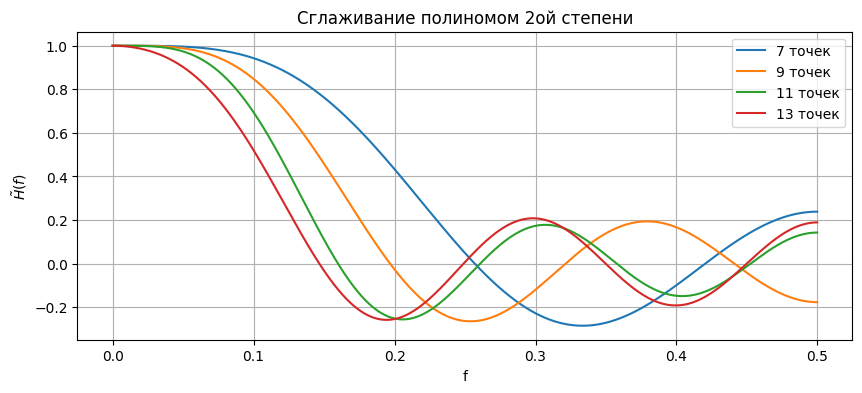

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

#функция вычисления
def H(w, koefs, s):
    curr_h = koefs[0]
    for i in range(1, len(koefs)):
      curr_h += koefs[i]*np.cos(i*w)
    return curr_h / s

step = 0.0003
# Циклические частоты
F = np.arange(0, 0.5, step)
# Круговые частоты
w = np.array([2 * math.pi * f for f in F])

#коэффициенты
k7 = [7,12,6,-4]
k9 = [59,108,78,28,-42]
k11 = [89,168,138,88,18,-72]
k13 = [25,48,42,32,18,-22]

s7 = 21
s9 = 231
s11 = 429
s13 = 143

#Вычисление функции
h_poly2_7 = H(w, k7, s7)
h_poly2_9 = H(w, k9, s9)
h_poly2_11 = H(w, k11, s11)
h_poly2_13 = H(w, k13, s13)

#построение графика
plt.figure(figsize=(10, 4))
plt.plot(F, h_poly2_7, label=f'7 точек')
plt.plot(F, h_poly2_9, label=f'9 точек')
plt.plot(F, h_poly2_11, label=f'11 точек')
plt.plot(F, h_poly2_13, label=f'13 точек')
plt.xlabel('f')
plt.ylabel('$\\tilde{H}(f)$')
plt.title('Сглаживание полиномом 2ой степени')
plt.legend()
plt.grid(True)
plt.show()

Анализ передаточных функций для сглаживания полиномом 2-й степени показывает, что данный метод также реализует фильтр нижних частот, но с более сложной частотной характеристикой. По сравнению со сглаживанием прямой линией, характеристики данных фильтров обладают более широкой полосой пропускания при том же количестве точек, однако подавление в полосе задерживания является более неравномерным. С увеличением количества точек (с 7 до 13) наблюдается ожидаемое сужение полосы пропускания и смещение первого минимума АЧХ в сторону более низких частот. Характерной особенностью является наличие всплесков в полосе подавления, что указывает на менее эффективное подавление некоторых высокочастотных составляющих по сравнению с идеальным ФНЧ. Таким образом, фильтры на основе полинома 2-й степени обеспечивают более точное аппроксимационное сглаживание, но их частотные свойства являются более сложными и менее гладкими.

### **3**. Сглаживание полиномом четвертой степени

Выведем формулу для сглаживания полиномом четвертой степени.

Выходной сигнал равен $y(t)= A + Bt + Ct^2 + Dt^3 + Et^4$

Входной сигнал равен $s(t)$

Приближение в смысле МНК по 15 точкам:
$F(A,B) = \sum_{k=-7}^{k=7}(s_k-y_k) = \sum_{k=-7}^{k=7}(s_k-A-Bt-Ct^2-Dt^3-Et^4)$

Система:

\begin{equation}
\left\{
\begin{aligned}
15A + 0B+280C+0D+9352E &= \sum_{k=-7}^{k=7}s_k \\
0A+280B+0C+9352D+0E &= \sum_{k=-7}^{k=7}k*s_k \\
280A+0B+9352C+0D+67184E &= \sum_{k=-7}^{k=7}k^2*s_k \\
0A+9352B+0C+67184D+0E &=\sum_{k=-7}^{k=7}k^3*s_k \\
9352A+0B+67184C+0D+585416E &= \sum_{k=-7}^{k=7}k^4*s_k
\end{aligned}
\right.
\end{equation}

Рашея систему, относительно A получаем:
$y_n= \frac{1}{46189}(2145s_{n-7} - 2860s_{n-6} - 2937s_{n-5} - 165s_{n-4} + 3755s_{n-3} + 7500s_{n-2} + 10125s_{n-1} + 11063s_n + 10125s_{n+1} + 7500{n+2}+ 3755s_{n+3} - 165s_{n+4} - 2937s_{n+5} - 2860s_{n+6} + 2145s_{n+7})$

Передаточная функция:
$H(\omega) = \frac{1}{46189}(11063+20250cos(\omega)+15000cos(2\omega)+7510cos(3\omega)-330cos(4\omega)-5874cos(5\omega)-5720cos(6\omega)+4290cos(7\omega))$

Аналогично рассчитываем для другого числа точек:

9 точек:

$H(\omega) = \frac{1}{429}(179+270cos(\omega)+60cos(2\omega)- 110cos(3\omega)+30cos(4\omega))$

11 точек:

$H(\omega) = \frac{1}{429}(143cos+240cos(\omega)+120cos(2\omega)-20cos(3\omega)-90cos(4\omega)+36cos(5\omega))$

13 точек:

$H(\omega) = \frac{1}{2431}(677+1200cos(\omega)+780cos(2\omega)+220cos(3\omega)-270cos(4\omega)-396cos(5\omega)+220cos(6\omega))$

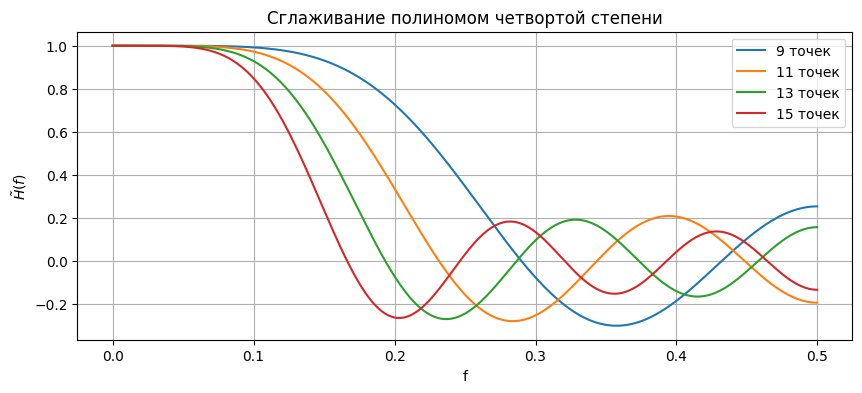

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

#функция вычисления
def H(w, koefs, s):
    curr_h = koefs[0]
    for i in range(1, len(koefs)):
      curr_h += koefs[i]*np.cos(i*w)
    return curr_h / s

step = 0.0003
# Циклические частоты
F = np.arange(0, 0.5, step)
# Круговые частоты
w = np.array([2 * math.pi * f for f in F])

#коэффициенты
k9 = [179,270,60,- 110,30]
k11 = [143,240,120,-20,-90,36]
k13 = [677,1200,780,220,-270,-396,220]
k15 = [11063,20250,15000,7510,-330,-5874,-5720,4290]

s9 = 429
s11 = 429
s13 = 2431
s15 = 46189

#Вычисление функции
h_poly4_9 = H(w, k9, s9)
h_poly4_11 = H(w, k11, s11)
h_poly4_13 = H(w, k13, s13)
h_poly4_15 = H(w, k15, s15)

#построение графика
plt.figure(figsize=(10, 4))
plt.plot(F, h_poly4_9, label=f'9 точек')
plt.plot(F, h_poly4_11, label=f'11 точек')
plt.plot(F, h_poly4_13, label=f'13 точек')
plt.plot(F, h_poly4_15, label=f'15 точек')
plt.xlabel('f')
plt.ylabel('$\\tilde{H}(f)$')
plt.title('Сглаживание полиномом четвортой степени')
plt.legend()
plt.grid(True)
plt.show()

Анализ передаточных функций для сглаживания полиномом 4-й степени демонстрирует дальнейшее усложнение частотных характеристик. Данные фильтры сохраняют свойства ФНЧ, но проявляют более выраженную избирательность - при том же количестве точек они обеспечивают более широкую полосу пропускания по сравнению с полиномами низших порядков. Характерной особенностью является наличие значительных всплесков в полосе подавления, особенно заметных для фильтра с 9 точками. С увеличением количества точек (с 9 до 15) наблюдается сужение переходной области и смещение первого минимума в область более низких частот, что свидетельствует об улучшении фильтрующих свойств, однако всплески в полосе задерживания сохраняются, указывая на сложный характер аппроксимации высоких частот.

### **4**. Сглаживание по формулам Спенсера

Для сглаживания по формулам Спенсера будем использовать следующие формулы:

Для 15 точек:

$y_n= \frac{1}{320}(-3s_{n-7}-6s_{n-6}-5s_{n-5}+3s_{n-4}+21s_{n-3}+46s_{n-2}+67s_{n-1}+74s_n+67s_{n+1}+46s_{n+2}+21s_{n+3}+3s_{n+4}-5s_{n+5}-6s_{n+6}-3s_{n+7}) $

$H(\omega) =\frac{1}{320}(74+134cos(\omega)+92cos(2\omega)+42cos(3\omega)+6cos(4\omega)-10cos(5\omega)-12cos(6\omega)-6cos(7\omega)$

Для 21 точки:

$y_n= \frac{1}{350}(-s_{n-10}-3s_{n-9}-5s_{n-8}-5s_{n-7}-2s_{n-6}+6s_{n-5}+18s_{n-4}+33s_{n-3}+47s_{n-2}+57s_{n-1}+60s_n+57s_{n+1}+47s_{n+2}+33s_{n+3}+18s_{n+4}+6s_{n+5}-2s_{n+6}-5s_{n+7}-5s_{n-8}-3s_{n-9}-s_{n-10}) $

$H(\omega) =\frac{1}{350}(60+114cos(\omega)+94cos(2\omega) +66cos(3\omega) +36cos(4\omega)+12cos(5\omega)-4cos(6\omega)-10cos(7\omega)-10cos(8\omega)-6cos(9\omega)-2cos(10\omega))$

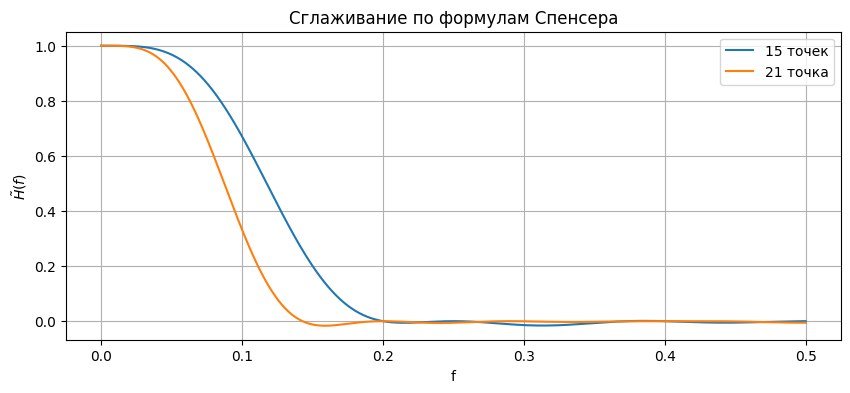

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

#функция вычисления
def H(w, koefs, s):
    curr_h = koefs[0]
    for i in range(1, len(koefs)):
      curr_h += koefs[i]*np.cos(i*w)
    return curr_h / s

step = 0.0003
# Циклические частоты
F = np.arange(0, 0.5, step)
# Круговые частоты
w = np.array([2 * math.pi * f for f in F])

#коэффициенты
k_15 = [74,134,92,42,6,-10,-12,-6]
k_21 = [60,114,94,66,36,12,-4,-10,-10,-6,-2]

s_15 = 320
s_21 = 350

#Вычисление функции
h_spens_15 = H(w, k_15, s_15)
h_spens_21 = H(w, k_21, s_21)

#построение графика
plt.figure(figsize=(10, 4))
plt.plot(F, h_spens_15, label=f'15 точек')
plt.plot(F, h_spens_21, label=f'21 точка')
plt.xlabel('f')
plt.ylabel('$\\tilde{H}(f)$')
plt.title('Сглаживание по формулам Спенсера')
plt.legend()
plt.grid(True)
plt.show()

Анализ фильтров Спенсера показывает их превосходство по частотным характеристикам по сравнению с полиномиальными фильтрами. Ключевой особенностью является исключительно гладкая АЧХ с монотонным спадом и практически полным отсутствием всплесков в полосе подавления. Фильтр на 15 точек демонстрирует хороший баланс между избирательностью и плавностью характеристики, в то время как 21-точечный фильтр обеспечивает идеально гладкую частотную характеристику с максимально эффективным подавлением высоких частот. Специально подобранные коэффициенты Спенсера минимизируют фазовые искажения и осцилляции, что делает эти фильтры оптимальным выбором для задач, требующих высококачественного сглаживания без искажения формы полезного сигнала. Увеличение количества точек с 15 до 21 приводит к существенному сужению полосы пропускания и улучшению фильтрующих свойств.

### **5**. Построение графиков из предыдущих пунктов в логарифмической шкале

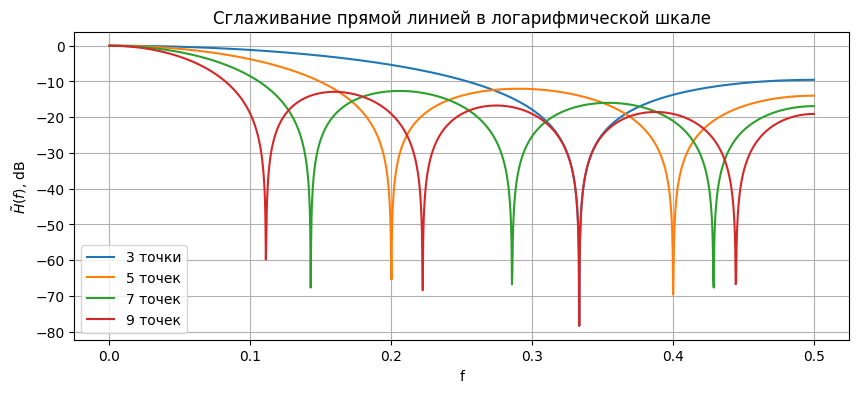

In [ ]:
plt.figure(figsize=(10, 4))
for n, h_n in h_lin.items():
  plt.plot(F, 20*np.log10(np.abs(h_n)), label=f'{n} точки' if n == 3 else f'{n} точек')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$, dB')
plt.title('Сглаживание прямой линией в логарифмической шкале')
plt.legend()
plt.grid(True)
plt.show()

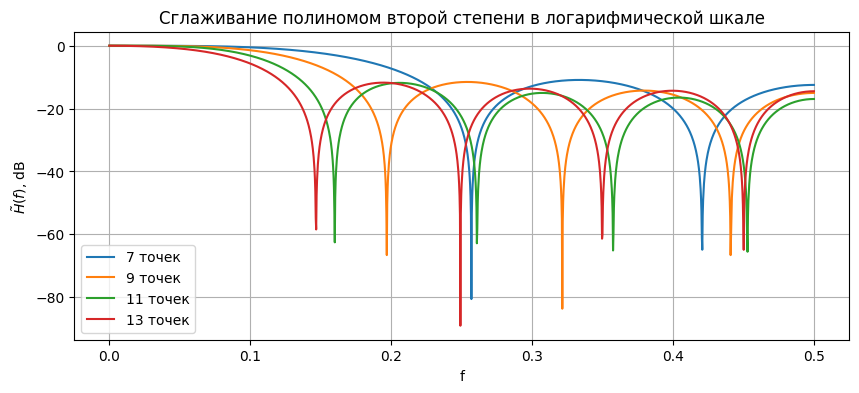

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(F, 20*np.log10(np.abs(h_poly2_7)), label=f'7 точек')
plt.plot(F, 20*np.log10(np.abs(h_poly2_9)), label=f'9 точек')
plt.plot(F, 20*np.log10(np.abs(h_poly2_11)), label=f'11 точек')
plt.plot(F, 20*np.log10(np.abs(h_poly2_13)), label=f'13 точек')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$, dB')
plt.title('Сглаживание полиномом второй степени в логарифмической шкале')
plt.legend()
plt.grid(True)
plt.show()

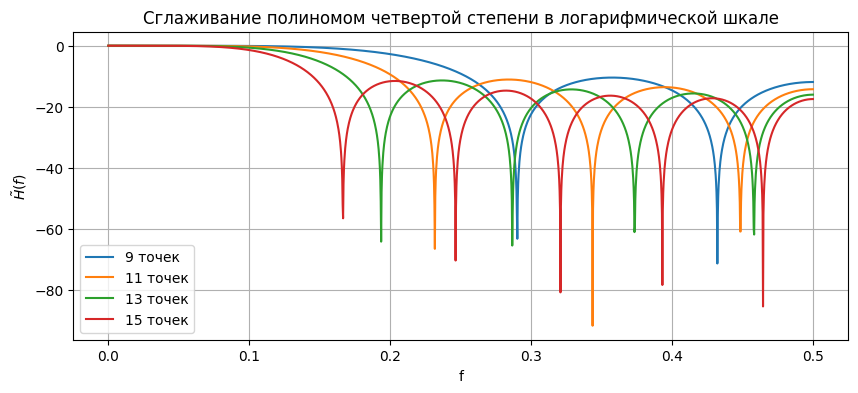

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(F, 20*np.log10(np.abs(h_poly4_9)), label=f'9 точек')
plt.plot(F, 20*np.log10(np.abs(h_poly4_11)), label=f'11 точек')
plt.plot(F, 20*np.log10(np.abs(h_poly4_13)), label=f'13 точек')
plt.plot(F, 20*np.log10(np.abs(h_poly4_15)), label=f'15 точек')
plt.xlabel('f')
plt.ylabel('$\\tilde{H}(f)$')
plt.title('Сглаживание полиномом четвертой степени в логарифмической шкале')
plt.legend()
plt.grid(True)
plt.show()

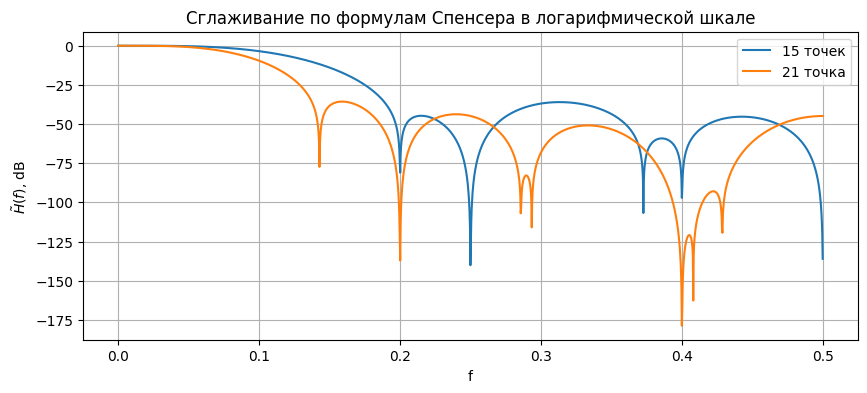

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(F, 20*np.log10(np.abs(h_spens_15)), label=f'15 точек')
plt.plot(F, 20*np.log10(np.abs(h_spens_21)), label=f'21 точка')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$, dB')
plt.title('Сглаживание по формулам Спенсера в логарифмической шкале')
plt.legend()
plt.grid(True)
plt.show()

В дБ-шкале отчетливо видны уровни подавления в полосе
задержания и сравнение по порядкам величин. В отличие от линейной шкалы
дБ‑графики подчеркивают различия глубины подавления и позволяют
корректно сравнивать частоты среза. Особенно наглядно проявляется разница в эффективности подавления высокочастотных составляющих между фильтрами разного порядка и с разным количеством точек. Также становятся хорошо заметными всплески АЧХ в полосе подавления у полиномиальных фильтров высших порядков, что критически важно для оценки их реальных фильтрующих свойств.

### **6**. Cопоставительный анализ свойств передаточных функций

1. Все фильтры - "низкочастотные"
Все изученные фильтры работают как сито: пропускают плавные изменения (низкие частоты) и задерживают резкие скачки (высокие частоты).

2. Чем сложнее фильтр, тем страннее его поведение

- Простая линия (1 степень) - плавно и предсказуемо ухудшает качество на высоких частотах

- Парабола (2 степень) - начинает "дергаться" на высоких частотах

- Сложные кривые (4 степень) - сильно "дёргаются", плохо работают на высоких частотах

- Фильтры Спенсера - самые плавные и стабильные

3. Размер имеет значение

Чем больше точек использует фильтр:

- Тем сильнее он сглаживает

- Тем больше "затирает" полезные резкие изменения

- Тем лучше убирает шумы

4. Лучший выбор

Фильтры Спенсера оказались самыми удобными - они хорошо сглаживают и при этом не "дергаются" на высоких частотах, в отличие от сложных полиномиальных фильтров.

### **7**. Выводы


В работе были исследованы различные методы сглаживания сигналов. Получены и проанализированы передаточные функции фильтров разных типов: от простого линейного сглаживания до сложных полиномиальных фильтров и формул Спенсера.

Самые математически сложные фильтры не всегда являются лучшими. Для надежного сглаживания часто лучше подходят более простые и стабильные методы, такие как фильтры Спенсера.